# Bikes example with different values of $\alpha$ and $m$

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_experimental as pmx
from pymc_experimental.bart.pgbart import compute_prior_probability

In [2]:
RANDOM_SEED = 8457
rng = np.random.RandomState(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
trees = [10, 20, 50, 100, 200]
alphas = [0.1, 0.25, 0.5]
idatas_bikes = {
    "10": {"0.1": {}, "0.25": {}, "0.5": {}},
    "20": {"0.1": {}, "0.25": {}, "0.5": {}},
    "50": {"0.1": {}, "0.25": {}, "0.5": {}},
    "100": {"0.1": {}, "0.25": {}, "0.5": {}},
    "200": {"0.1": {}, "0.25": {}, "0.5": {}},
}

In [5]:
for m in trees:
    for alpha in alphas:
        with pm.Model() as model_bikes:
            σ = pm.HalfNormal("σ", Y.std())
            μ = pmx.BART("μ", X, Y, m=m, alpha=alpha)
            y = pm.Normal("y", μ, σ, observed=Y)
            idata = pm.sample(chains=4, random_seed=RANDOM_SEED)
            idatas_bikes[str(m)][str(alpha)] = idata

Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
The acceptance probability does not match the target. It is 0.8887, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.7209, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8832, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
The acceptance probability does not match the target. It is 0.8874, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 98 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 105 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 121 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 202 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 227 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 270 seconds.
The acceptance probability does not match the target. It is 0.8821, but should be close to 0.8. Try to increase the number of tuning steps.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 412 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 451 seconds.
Multiprocess sampling (4 chains in 3 jobs)
CompoundStep
>NUTS: [σ]
>PGBART: [μ]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 565 seconds.
The acceptance probability does not match the target. It is 0.8798, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8821, but should be close to 0.8. Try to increase the number of tuning steps.


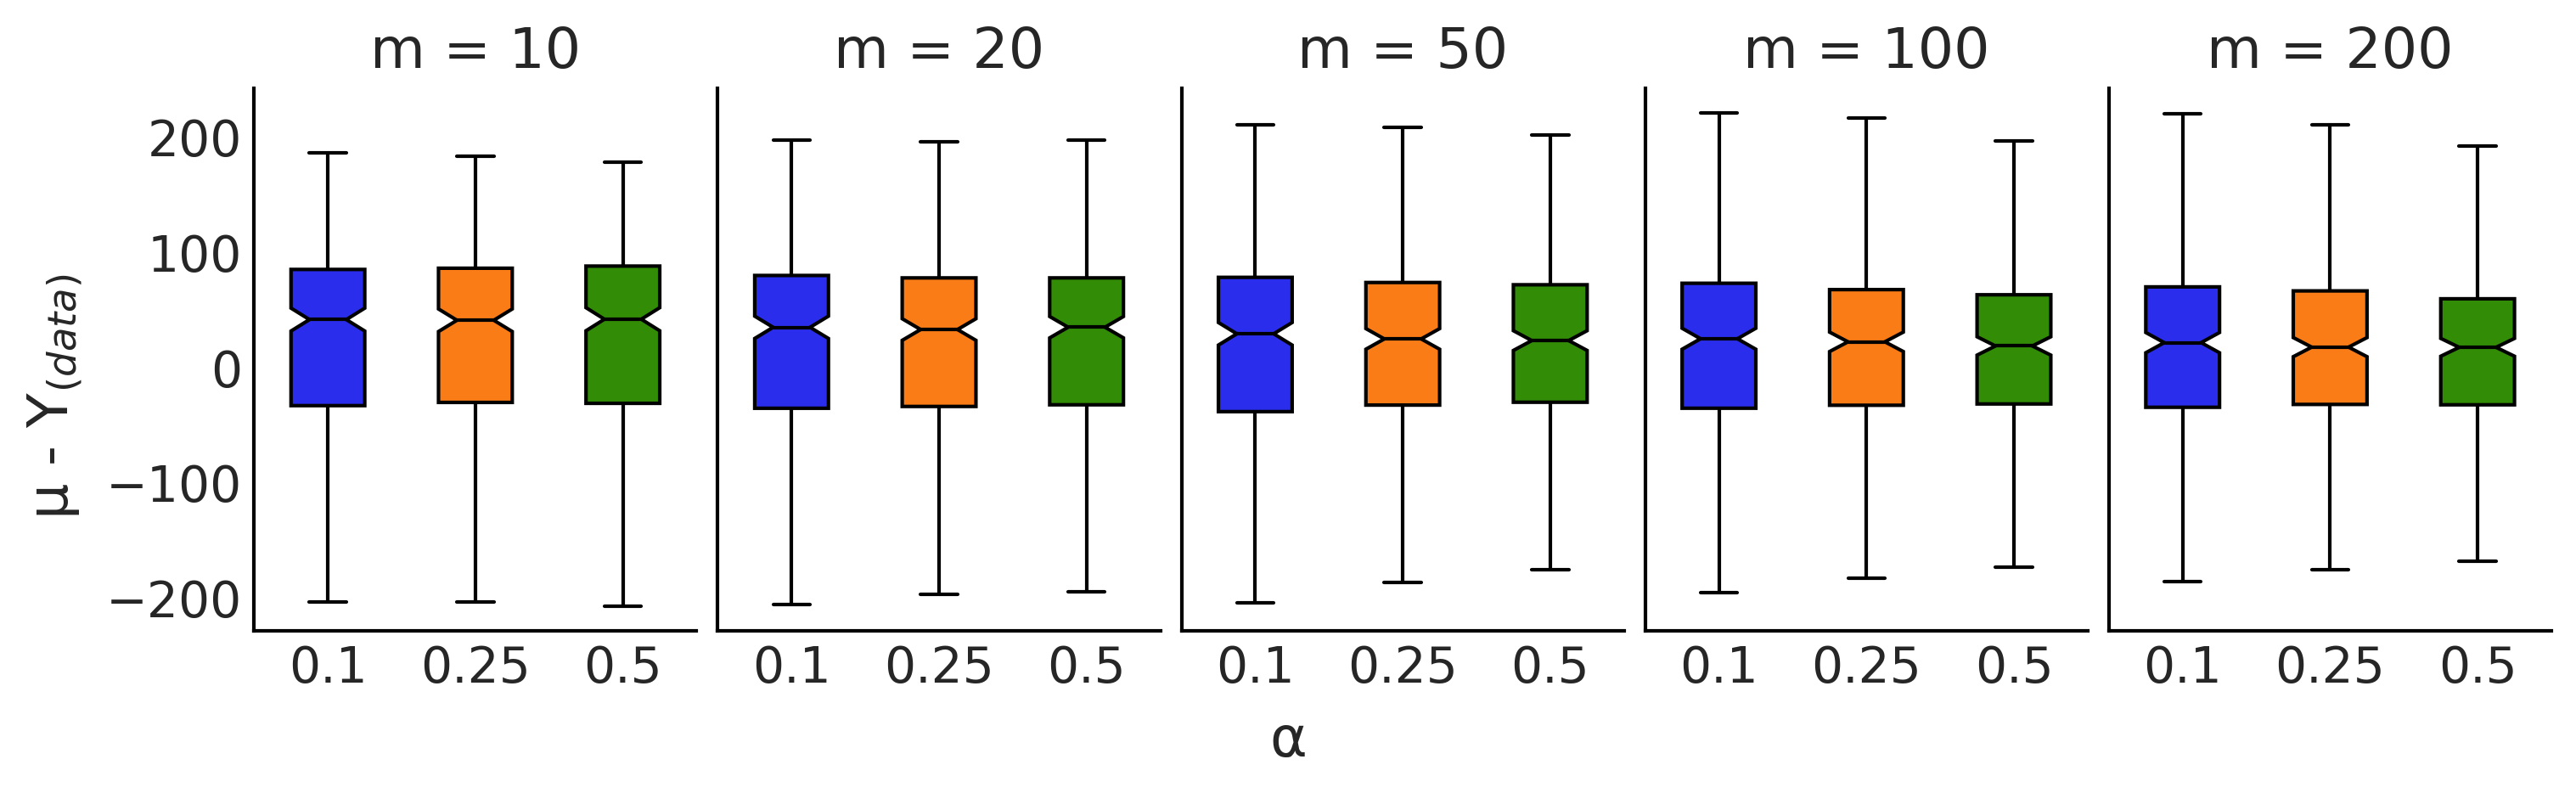

In [6]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True)

axes = axes.ravel()

for m, ax in zip(trees, axes):
    means = [
        idatas_bikes[str(m)][str(alpha)]["posterior"]["μ"].mean(("chain", "draw")) - Y
        for alpha in alphas
    ]
    box = ax.boxplot(
        means,
        notch=True,
        patch_artist=True,
        widths=0.5,
        labels=alphas,
        showfliers=False,
        medianprops=dict(color="k"),
    )
    for patch, color in zip(box["boxes"], ["C0", "C1", "C2", "C3"]):
        patch.set_facecolor(color)
        ax.set_title(f"m = {m}")

fig.supxlabel(r"α", fontsize=16)
fig.supylabel(r"μ - Y$_{(data)}$", fontsize=16)

plt.savefig("boxplots_bikes.png")

## PSIS-LOO-CV

In [7]:
model_compare = az.compare(
    {
        "m10": idatas_bikes["10"]["0.25"],
        "m20": idatas_bikes["20"]["0.25"],
        "m50": idatas_bikes["50"]["0.25"],
        "m100": idatas_bikes["100"]["0.25"],
        "m200": idatas_bikes["200"]["0.25"],
    }
)

In [8]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m200,0,-2151.642907,21.410152,0.000000,1.000000e+00,19.206484,0.000000,False,log
m100,1,-2161.925498,22.471566,10.282591,0.000000e+00,19.280134,1.032658,False,log
m50,2,-2178.552655,23.779915,26.909749,0.000000e+00,19.552951,2.879011,False,log
m20,3,-2206.127855,28.458795,54.484948,0.000000e+00,19.844745,5.189818,False,log
m10,4,-2233.826731,34.634668,82.183825,6.698173e-10,19.841545,6.810924,False,log


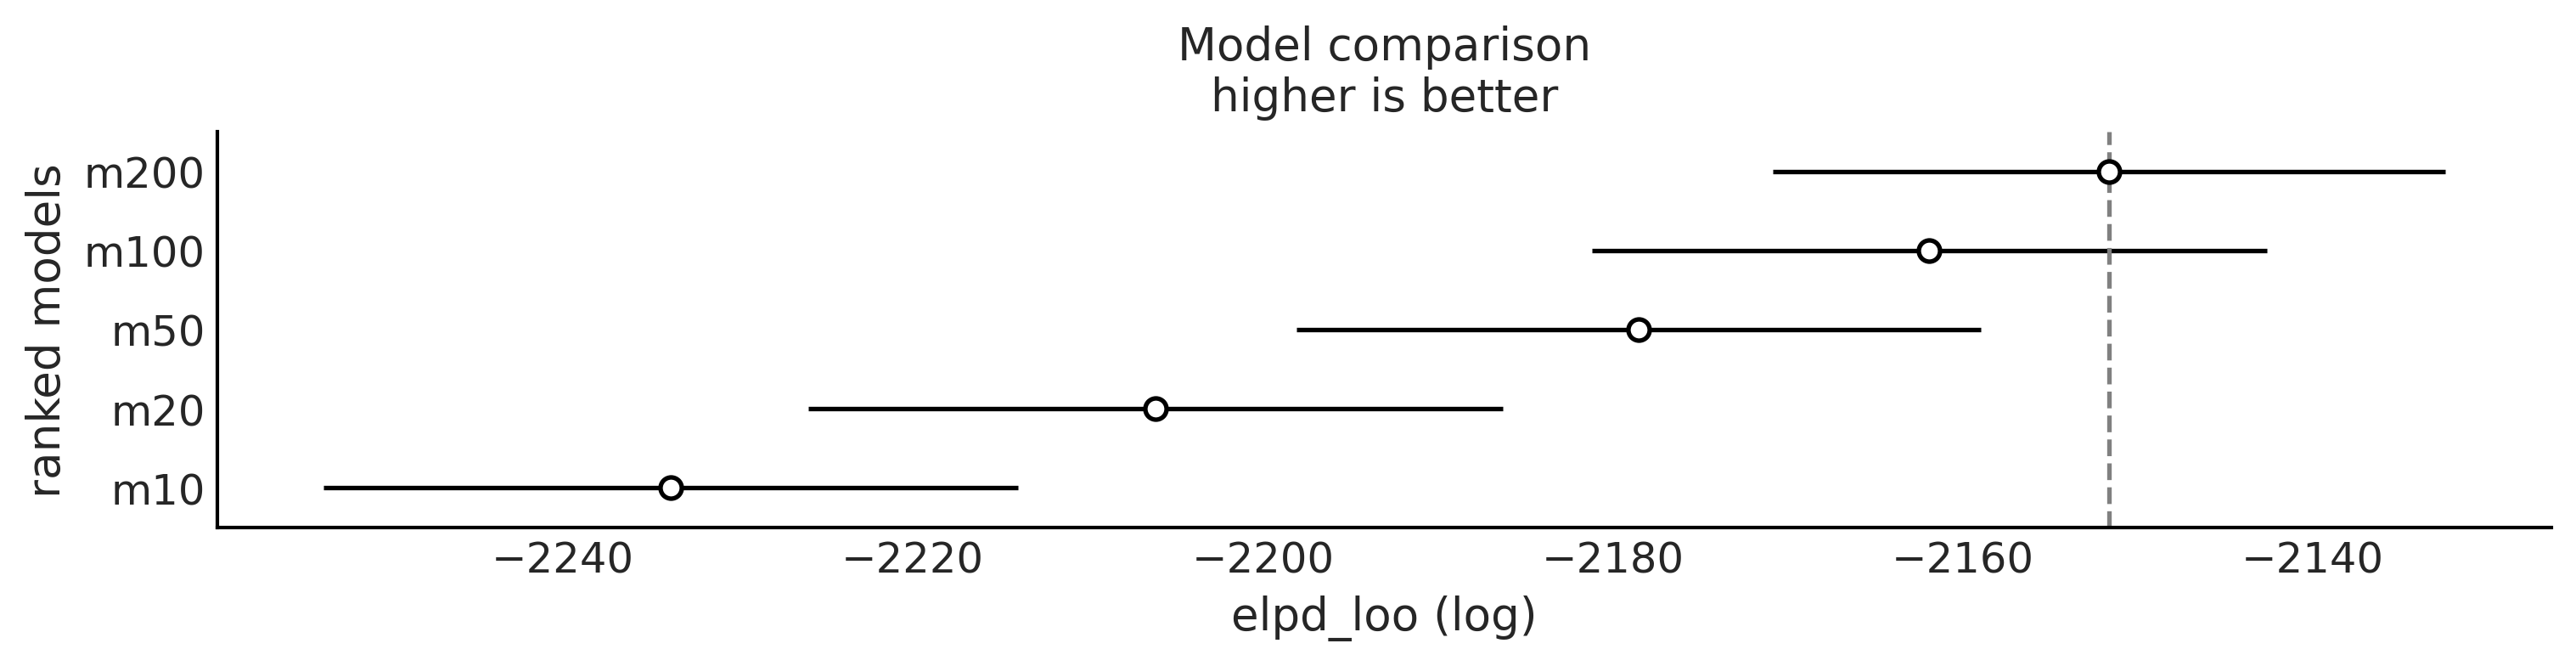

In [9]:
az.plot_compare(
    model_compare,
    plot_ic_diff=False,
    insample_dev=False,
    figsize=(10, 2.5),
    legend=False,
)
plt.savefig("loo_bikes-trees-alphas.png")

## Tree extraction  

In [10]:
trees_length = {
    "10": {"0.1": {}, "0.25": {}, "0.5": {}},
    "20": {"0.1": {}, "0.25": {}, "0.5": {}},
    "50": {"0.1": {}, "0.25": {}, "0.5": {}},
    "100": {"0.1": {}, "0.25": {}, "0.5": {}},
    "200": {"0.1": {}, "0.25": {}, "0.5": {}},
}

In [11]:
for m in trees:
    for alpha in alphas:
        tmp_list = []
        idata = idatas_bikes[f"{m}"][f"{alpha}"].sample_stats.bart_trees
        for chain in idata:
            for sample in chain:
                for tree in sample:
                    index = max(tree.item().tree_structure.keys())
                    tmp_list.append(pmx.bart.tree.BaseNode(index).depth)
        trees_length[f"{m}"][f"{alpha}"] = pd.Series(tmp_list)

In [12]:
# Trees' depth probabilities based on alpha values
prob_alphas = []
for alpha in alphas:
    q = compute_prior_probability(alpha)
    p = 1 - np.array(q)
    p = p / p.sum()
    prob_alphas.append(p)

### Frequency of trees depths

In [13]:
wd = 0.33
wd_lst = [0, wd, wd * 2]

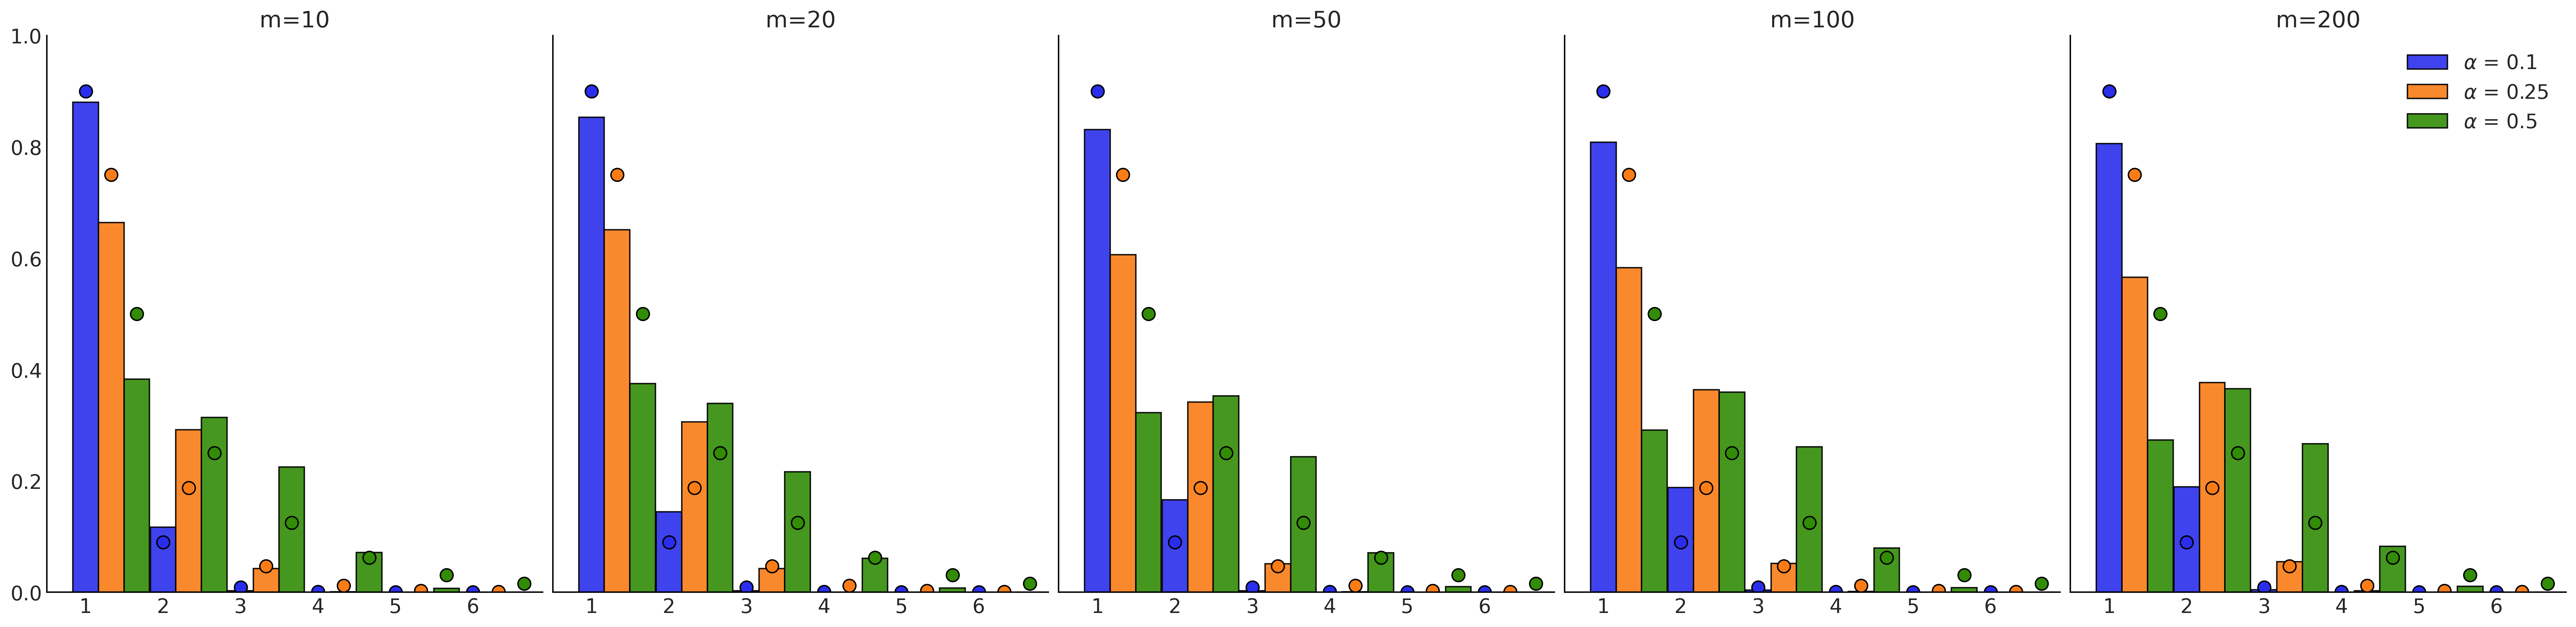

In [14]:
# All frequencies in one plot
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=True)

for m, ax in zip(trees, axes.ravel()):
    for i in range(len(alphas)):
        # Trees Depth Frequencies
        frequency = (
            trees_length[f"{m}"][f"{alphas[i]}"]
            .value_counts(normalize=True)
            .sort_index(ascending=True)
        )
        ax.bar(
            frequency.index + wd_lst[i],
            frequency.values,
            color=f"C{i}",
            width=wd,
            edgecolor="k",
            alpha=0.9,
            label=rf"$\alpha$ = {alphas[i]}",
        )
        # Probabilities
        x = np.array(range(1, len(prob_alphas[i]) + 1)) + wd_lst[i]
        ax.scatter(
            x,
            prob_alphas[i],
            facecolor=f"C{i}",
            edgecolor="k",
            marker="o",
            s=80,
            zorder=2,
        )

    major_ticks = np.arange(0, 7, 1)
    ax.set_xticks(major_ticks)
    ax.set_ylim(0, 1)
    ax.set_xlim(0.5, 6.9)
    ax.set_title(f"m={m}")
    if m == 200:
        ax.legend()

plt.savefig("bikes_trees_alphas_hist.png");